<h2>Data wrangling to oabtain statistics about the daily % changes of the bitcoin price</h2>

In [1]:
#import libraries
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the raw dataset of minute-to-minute bitcoin prices built in 02-EDA notebook.
data = pd.read_csv('../data/processed/complete_data.csv')

In [3]:
data.head()

,Unnamed: 0,high,timestamp,volume,low,close,open,date
0,0,11.69,1313798400,0.0,11.69,11.69,11.69,2011-08-20 00:00:00
1,1,11.69,1313798460,0.0,11.69,11.69,11.69,2011-08-20 00:01:00
2,2,11.69,1313798520,0.0,11.69,11.69,11.69,2011-08-20 00:02:00
3,3,11.69,1313798580,0.0,11.69,11.69,11.69,2011-08-20 00:03:00
4,4,11.69,1313798640,0.0,11.69,11.69,11.69,2011-08-20 00:04:00


In [4]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,high,timestamp,volume,low,close,open,date
0,11.69,1313798400,0.0,11.69,11.69,11.69,2011-08-20 00:00:00
1,11.69,1313798460,0.0,11.69,11.69,11.69,2011-08-20 00:01:00
2,11.69,1313798520,0.0,11.69,11.69,11.69,2011-08-20 00:02:00
3,11.69,1313798580,0.0,11.69,11.69,11.69,2011-08-20 00:03:00
4,11.69,1313798640,0.0,11.69,11.69,11.69,2011-08-20 00:04:00


In [9]:
data.index = pd.to_datetime(data['date']).dt.date
data.head()

,high,timestamp,volume,low,close,open,date
date,,,,,,,
2011-08-20,11.69,1313798400,0.0,11.69,11.69,11.69,2011-08-20 00:00:00
2011-08-20,11.69,1313798460,0.0,11.69,11.69,11.69,2011-08-20 00:01:00
2011-08-20,11.69,1313798520,0.0,11.69,11.69,11.69,2011-08-20 00:02:00
2011-08-20,11.69,1313798580,0.0,11.69,11.69,11.69,2011-08-20 00:03:00
2011-08-20,11.69,1313798640,0.0,11.69,11.69,11.69,2011-08-20 00:04:00


In [17]:
#Grouping and aggregating the data to extract features about how the price moved every day in % terms.
daily_moves = data.groupby(data.index)\
                       .agg({'close': [lambda x: (x[-1]/x[0] -1 ) * 100,
                                       lambda x: (max(x)/x[0] -1) * 100,
                                       lambda x: (min(x)/x[0] -1) * 100,
                                       lambda x: (x[-1]/min(x) -1) * 100,
                                       lambda x: (max(x)/min(x) - 1) * 100,
                                       lambda x: (x[-1]/max(x) - 1) * 100]})

daily_moves.columns = ['open-close', 'open-max', 'open-min', 'min-close', 'min-max', 'max-close']

daily_moves.head()

,open-close,open-max,open-min,min-close,min-max,max-close
date,,,,,,
2011-08-20,0.085543,0.085543,0.00000,0.085543,0.085543,0.00000
2011-08-21,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
2011-08-22,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
2011-08-23,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
2011-08-24,-10.256410,0.000000,-10.25641,0.000000,11.428571,-10.25641


In [18]:
daily_moves.describe()

,open-close,open-max,open-min,min-close,min-max,max-close
count,3473.000000,3473.000000,3473.000000,3473.000000,3473.000000,3473.000000
mean,0.359740,2.958363,-2.943126,3.525592,6.428530,-2.417802
std,4.863904,7.838115,4.466041,5.306988,12.365362,3.652651
min,-48.518519,0.000000,-69.123457,0.000000,0.000000,-81.666667
25%,-1.214787,0.536478,-3.425926,1.040492,2.384146,-2.865681
50%,0.189207,1.481177,-1.555360,2.105263,4.196688,-1.309494
75%,1.935315,3.601502,-0.630839,4.238879,7.216444,-0.576074
max,56.133829,400.000000,0.000000,119.800000,500.000000,0.000000


In [19]:
daily_moves.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3473 entries, 2011-08-20 to 2021-02-20
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open-close  3473 non-null   float64
 1   open-max    3473 non-null   float64
 2   open-min    3473 non-null   float64
 3   min-close   3473 non-null   float64
 4   min-max     3473 non-null   float64
 5   max-close   3473 non-null   float64
dtypes: float64(6)
memory usage: 189.9+ KB


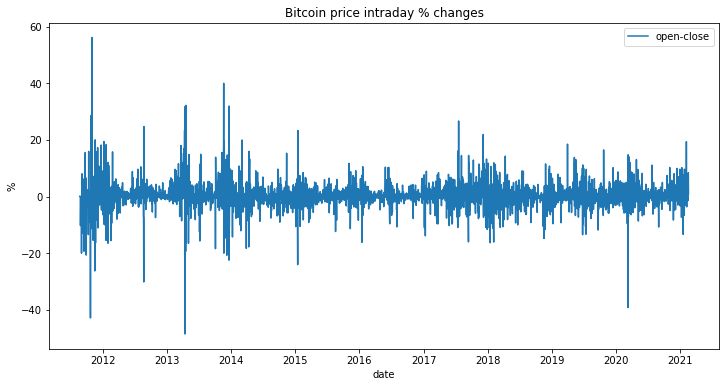

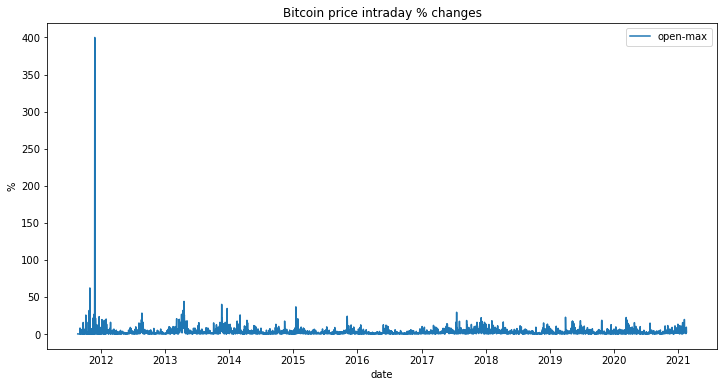

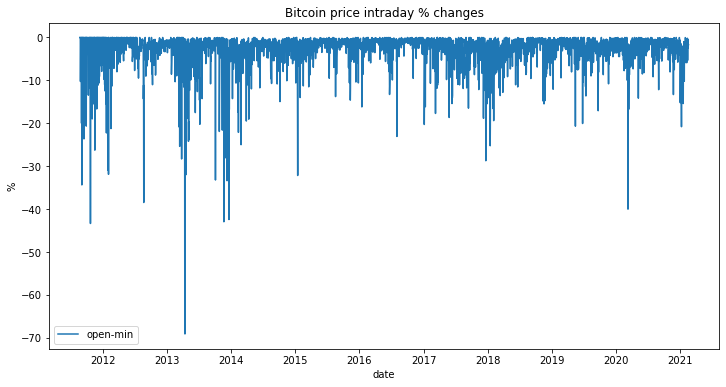

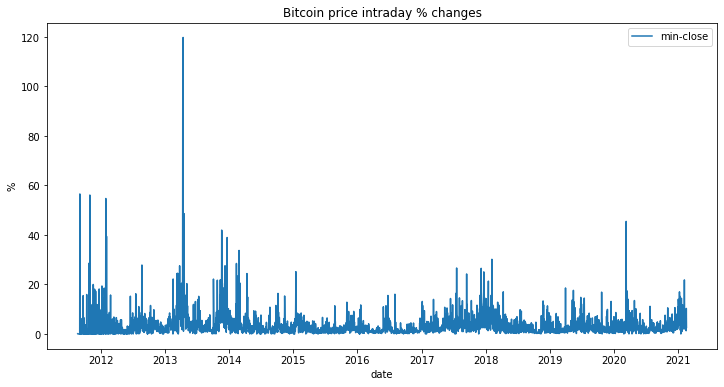

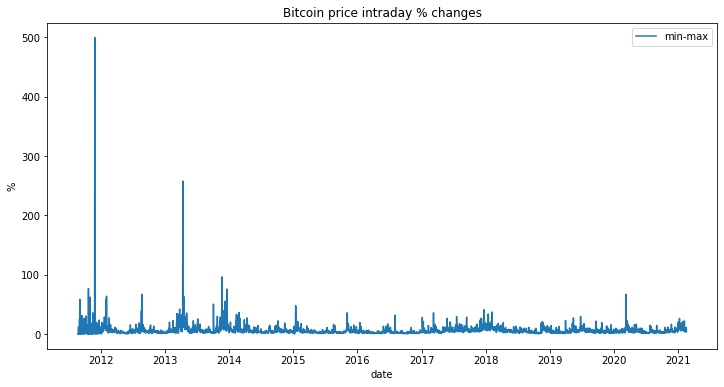

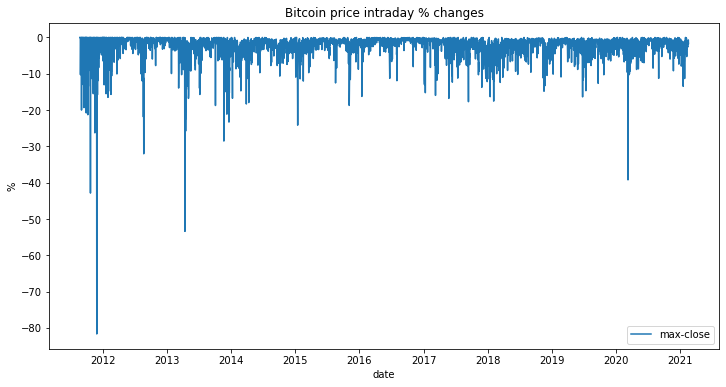

In [29]:
#Grouped data EDA.
for column in daily_moves.columns:
    plt.figure(figsize=(12,6))
    plt.plot(daily_moves[column], label=column)
    plt.legend(loc='best')
    plt.title('Bitcoin price intraday % changes')
    plt.ylabel('%')
    plt.xlabel('date')
    #plt.xticks(np.arange(0, len(daily_moves[column] + 1), 365*2))
    plt.show()

In [30]:
#Saving the grouped data.
daily_moves.to_csv('../data/processed/daily_moves.csv')
print('File saved')

File saved
